### Import libraries

In [1]:
import pandas as pd
import os
import shutil
import sys
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import matplotlib.pyplot as plt
# import tensorflow as tf
from tensorflow import keras
import tensorflow

from  tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

### Check out the directories

In [2]:
# inserting the parent directory into current path
sys.path.insert(1, '../Lung_Disease_Detection_Deeplearning/')

In [3]:
os.listdir('../Dataset_augmented_subfolders/')

['Test', 'Train', 'val']

In [4]:
os.listdir('../\Dataset_augmented_subfolders/Train/')

['COVID', 'NORMAL']

In [5]:
Train_NORMAL = os.listdir('../Dataset_augmented_subfolders/Train/NORMAL/')
print('Train_NORMAL = ', len(Train_NORMAL))

Train_NORMAL =  563


In [6]:
Train_Covid = os.listdir('../Dataset_augmented_subfolders/Train/COVID/')
print('Train_Covid = ', len(Train_Covid))

Train_Covid =  584


## Quick look to the images 

In [7]:
print('names \n ', Train_NORMAL[0], '\n' ,Train_Covid[0])

names 
  augmented_normal_0_4086.jpeg 
 augmented_covid_0_4049.jpeg


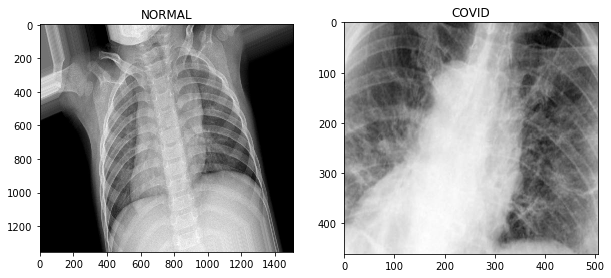

In [8]:
# ref https://www.kaggle.com/feyzazkefe/pneumonia-detection-using-cnn-89-42-acc

img_name = 'augmented_normal_0_4086.jpeg '
img_normal = load_img('../Dataset_augmented_subfolders/Train/NORMAL/' + img_name)

img_name_1 = 'augmented_covid_0_4049.jpeg'
img_pneumonia = load_img('../Dataset_augmented_subfolders/Train/COVID/' + img_name_1)

fig, axs = plt.subplots(1,2,figsize=(10,6))
axs[0].imshow(img_normal)
axs[0].set_title("NORMAL")
axs[1].imshow(img_pneumonia)
axs[1].set_title("COVID");

plt.savefig("../Assets/plot_01_assets_1.png")

### Assemble CNN model

Lets use inceptionv3 network.

In [49]:
# from tensorflow.keras.applications.inception_v3 import InceptionV3
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
# from tensorflow.keras.layers import Input

model = VGG16(include_top=False)

58892288/58889256 [==============================] - 2s 0us/step


### Metrics

In [50]:
metr_auc = tensorflow.keras.metrics.AUC(num_thresholds=200, curve='ROC')
TP = tensorflow.keras.metrics.TruePositives(thresholds=None, name=None, dtype=None)
TN = tensorflow.keras.metrics.TrueNegatives(thresholds=None, name=None, dtype=None)
FP = tensorflow.keras.metrics.FalsePositives(thresholds=None, name=None, dtype=None)
FN = tensorflow.keras.metrics.FalseNegatives(thresholds=None, name=None, dtype=None)

Recall_metr = tensorflow.keras.metrics.Recall(thresholds=None, top_k=None, 
                class_id=None, name=None, dtype=None)
# mtr_list = ['accuracy','mse', metr_auc,TP,TN,FP,FN]
mtr_list = ['accuracy', metr_auc]

### Load InceptionV3 network

In [13]:
# # ref: https://keras.io/examples/vision/image_classification_from_scratch/
# # create the base pre-trained model
# # base_model = InceptionV3(weights='imagenet', include_top=False)
# # this could also be the output a different Keras model or layer
# input_tensor = Input(shape=(224, 224, 3))

# base_model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=True)


# x = base_model.output

# # let's add a fully-connected layer
# x = Dense(1024, activation='relu')(x)
# # and a logistic layer -- let's say we have 1 classes
# predictions = Dense(1, activation='softmax')(x)

# # this is the model we will train
# model = Model(inputs=base_model.input, outputs=predictions)

# # first: train only the top layers (which were randomly initialized)
# # i.e. freeze all convolutional InceptionV3 layers
# for layer in base_model.layers:
#     layer.trainable = False

# # compile the model (should be done *after* setting layers to non-trainable)
# model.compile(optimizer='rmsprop', 
#               loss='categorical_crossentropy',
#               metrics=mtr_list)

In [51]:
# load model and specify a new input shape for images
new_input = Input(shape=(224, 224, 3))
model = VGG16(include_top=False, input_tensor=new_input)

In [53]:
# load model and specify a new input shape for images and avg pooling output
new_input = Input(shape=(224, 224, 3))
model = VGG16(include_top=False, input_tensor=new_input, pooling='avg')

In [55]:
# define a new model with random weights and 10 classes
new_input = Input(shape=(224, 224, 3))
model = VGG16(weights=None, input_tensor=new_input, classes=2)

In [57]:
# example of loading the vgg16 model
from tensorflow.keras.applications.vgg16 import VGG16
# load model
model = VGG16()
# summarize the model
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [58]:
# ref: https://keras.io/examples/vision/image_classification_from_scratch/
# create the base pre-trained model
# base_model = InceptionV3(weights='imagenet', include_top=False)
# this could also be the output a different Keras model or layer
input_tensor = Input(shape=(224, 224, 3))

base_model = VGG16(input_tensor=input_tensor, weights='imagenet', include_top=True)


x = base_model.output

# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 1 classes
predictions = Dense(1, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=mtr_list)

In [59]:
# summarize the model
model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [14]:
# model = Sequential()

# model.add(Conv2D(32, kernel_size=(3,3),
#                  activation='relu',
#                  input_shape=(224,224,3)))
# model.add(Conv2D(64, kernel_size=(3,3),
#                  activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64, kernel_size=(3,3),
#                  activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(128, kernel_size=(3,3),
#                  activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))

In [60]:
# model.compile(loss=keras.losses.binary_crossentropy,
#               optimizer='adam', 
#               metrics=mtr_list)


# model.summary()

### Prepare the data

In [16]:
train_datagen = image.ImageDataGenerator(
                featurewise_center=False, samplewise_center=False,
                featurewise_std_normalization=False, samplewise_std_normalization=False,
                zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0,
                height_shift_range=0.0, brightness_range=None, shear_range=0.2, zoom_range=0.2,
                channel_shift_range=0.0, fill_mode='nearest', cval=0.0,
                horizontal_flip=True, vertical_flip=False, rescale=1./255,
                preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)

In [17]:
val_dataset = image.ImageDataGenerator(rescale=1./255)

In [18]:
train_generator = train_datagen.flow_from_directory(
                    directory='../Dataset_augmented_subfolders/Train/',
                    target_size=(224,224),
                    color_mode="rgb",
                    classes=None,
                    class_mode="binary",
                    batch_size=32,
                    shuffle=True,
                    seed=1234,
                    save_to_dir=None,
                    save_prefix="",
                    save_format="png",
                    follow_links=False,
                    subset=None,
                    interpolation="nearest")

Found 1147 images belonging to 2 classes.


In [19]:
train_generator.class_indices

{'COVID': 0, 'NORMAL': 1}

In [20]:
validation_generator = val_dataset.flow_from_directory(
                        directory='../Dataset_augmented_subfolders/val/',
                        target_size=(224,224),
                        color_mode="rgb",
                        classes=None,
                        class_mode="binary",
                        batch_size=32,
                        shuffle=True,
                        seed=1234,
                        save_to_dir=None,
                        save_prefix="",
                        save_format="png",
                        follow_links=False,
                        subset=None,
                        interpolation="nearest")

Found 570 images belonging to 2 classes.


In [21]:
validation_generator.class_indices

{'COVID': 0, 'NORMAL': 1}

In [22]:
test_dataset = image.ImageDataGenerator(rescale=1./255)

In [23]:
test_generator = test_dataset.flow_from_directory(
                        directory='../Dataset_augmented_subfolders/Test/',
                        target_size=(224,224),
                        color_mode="rgb",
                        classes=None,
                        class_mode="binary",
                        batch_size=32,
                        shuffle=True,
                        seed=1234,
                        save_to_dir=None,
                        save_prefix="",
                        save_format="png",
                        follow_links=False,
                        subset=None,
                        interpolation="nearest")

Found 200 images belonging to 2 classes.


### Check out some of images after data augmentation in training data set

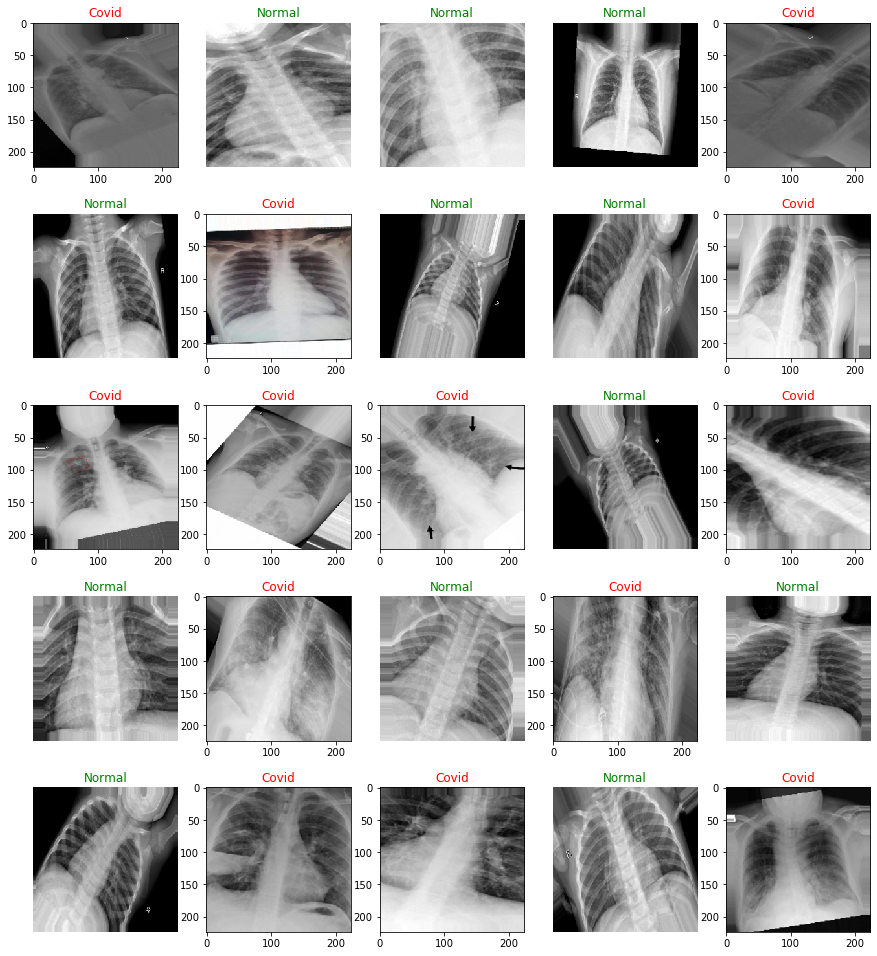

In [24]:
# ref https://www.kaggle.com/feyzazkefe/pneumonia-detection-using-cnn-89-42-acc
image_batch, label_batch = next(iter(train_generator))

def show_batch(image_batch, label_batch):
    plt.figure(figsize=(15, 17))
    for n in range(25):
        ax = plt.subplot(5, 5, n + 1)
        plt.imshow(image_batch[n])
        if label_batch[n] ==0:
            tit = plt.title("Covid")
            plt.setp(tit, color='r')

        else:
            tit = plt.title("Normal")
            plt.setp(tit, color='g')
            plt.axis("off")

show_batch(image_batch, label_batch)
plt.savefig("../Assets/plot_01_assets_2.png")

### Train the CNN model

In [61]:
model_history = model.fit_generator(
                generator=train_generator, steps_per_epoch=10, epochs=5, verbose=1, callbacks=None,
                validation_data= validation_generator, validation_steps=2, validation_freq=1,
                class_weight=None, max_queue_size=10, workers=1, use_multiprocessing=False,
                shuffle=True, initial_epoch=0
            )

Epoch 1/5
10/10 [==============================] - 16s 2s/step - loss: 0.0000e+00 - accuracy: 0.4594 - auc_1: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5469 - val_auc_1: 0.5000
Epoch 2/5
10/10 [==============================] - 17s 2s/step - loss: 0.0000e+00 - accuracy: 0.4656 - auc_1: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000 - val_auc_1: 0.5000
Epoch 3/5
10/10 [==============================] - 17s 2s/step - loss: 0.0000e+00 - accuracy: 0.4625 - auc_1: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5625 - val_auc_1: 0.5000
Epoch 4/5
10/10 [==============================] - 17s 2s/step - loss: 0.0000e+00 - accuracy: 0.5175 - auc_1: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.4375 - val_auc_1: 0.5000
Epoch 5/5
10/10 [==============================] - 17s 2s/step - loss: 0.0000e+00 - accuracy: 0.4952 - auc_1: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5312 - val_auc_1: 0.5000


In [26]:
# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

0 input_3
1 conv2d_188
2 batch_normalization_188
3 activation_188
4 conv2d_189
5 batch_normalization_189
6 activation_189
7 conv2d_190
8 batch_normalization_190
9 activation_190
10 max_pooling2d_8
11 conv2d_191
12 batch_normalization_191
13 activation_191
14 conv2d_192
15 batch_normalization_192
16 activation_192
17 max_pooling2d_9
18 conv2d_196
19 batch_normalization_196
20 activation_196
21 conv2d_194
22 conv2d_197
23 batch_normalization_194
24 batch_normalization_197
25 activation_194
26 activation_197
27 average_pooling2d_18
28 conv2d_193
29 conv2d_195
30 conv2d_198
31 conv2d_199
32 batch_normalization_193
33 batch_normalization_195
34 batch_normalization_198
35 batch_normalization_199
36 activation_193
37 activation_195
38 activation_198
39 activation_199
40 mixed0
41 conv2d_203
42 batch_normalization_203
43 activation_203
44 conv2d_201
45 conv2d_204
46 batch_normalization_201
47 batch_normalization_204
48 activation_201
49 activation_204
50 average_pooling2d_19
51 conv2d_200
52 c

In [28]:
# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
    layer.trainable = False
for layer in model.layers[249:]:
    layer.trainable = True

In [48]:
# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), 
              loss='categorical_crossentropy')

NameError: name 'adam' is not defined

In [44]:
# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
model_history = model.fit_generator(
                generator=train_generator, steps_per_epoch=200, epochs=10, verbose=1, callbacks=None,
                validation_data= validation_generator, validation_steps=2, validation_freq=1,
                class_weight=None, max_queue_size=10, workers=1, use_multiprocessing=False,
                shuffle=True, initial_epoch=0
            )

Epoch 1/10
 36/200 [====>.........................] - 28s 766ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00


### Plot the History

In [37]:
# list all data in history
print('len(model_history.history.keys()) \n', 
      len(model_history.history.keys()),'\n')
print(model_history.history.keys())

len(model_history.history.keys()) 
 6 

dict_keys(['loss', 'accuracy', 'auc', 'val_loss', 'val_accuracy', 'val_auc'])


In [38]:
model_history_df = pd.DataFrame(model_history.history)
model_history_df

,loss,accuracy,auc,val_loss,val_accuracy,val_auc
0,0.0,0.512500,0.5,0.0,0.500000,0.5
1,0.0,0.471875,0.5,0.0,0.406250,0.5
2,0.0,0.514286,0.5,0.0,0.515625,0.5
3,0.0,0.450000,0.5,0.0,0.515625,0.5
4,0.0,0.457143,0.5,0.0,0.531250,0.5
5,0.0,0.493750,0.5,0.0,0.468750,0.5
6,0.0,0.517460,0.5,0.0,0.625000,0.5
7,0.0,0.471875,0.5,0.0,0.453125,0.5
8,0.0,0.495238,0.5,0.0,0.437500,0.5
9,0.0,0.487500,0.5,0.0,0.578125,0.5


In [39]:
model_history_df.columns

Index(['loss', 'accuracy', 'auc', 'val_loss', 'val_accuracy', 'val_auc'], dtype='object')

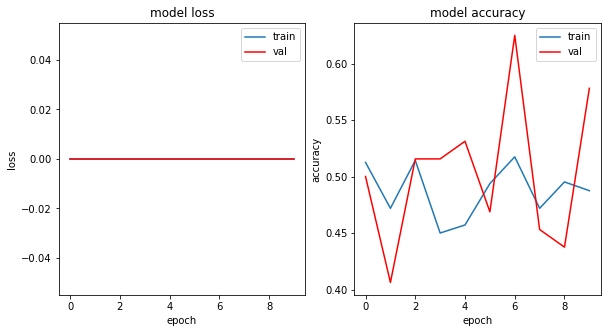

In [40]:
# plt.figure(figsize=(15,17))
# columns = ['loss', 'accuracy', 'mse', 'auc', 'true_positives', 'true_negatives',
#            'false_positives', 'false_negatives']
plt.figure(figsize=(15,17))
columns = ['loss', 'accuracy']
for i,col in enumerate(columns):
    
    plt.subplot(3, 3, i+1)
    
    plt.plot(model_history_df[col])
    plt.plot(model_history_df['val_'+col], color='red')
    plt.title('model '+col)
    plt.ylabel(col)
    plt.xlabel('epoch')
    plt.legend(['train', 'val'])
    
plt.savefig("../Figures/plot_01_1.png")

In [98]:
model.save("../Codes/Models/transfer_InceptionV3_model_twoClass.h5")

### Model evaluation

In [64]:
model.evaluate_generator(train_generator)

[0.3659663498401642, 0.8718395829200745, 0.9419602751731873]

In [65]:
model.evaluate_generator(validation_generator)

[0.3752581477165222, 0.8649122714996338, 0.9376977682113647]

In [66]:
model.evaluate_generator(test_generator)

[0.3398384153842926, 0.8999999761581421, 0.9648000001907349]

### Test model on test set data

Check out the Normal cases data from normal test directory

In [95]:
NORMAL_img_list = os.listdir('../Dataset_augmented_subfolders/Test/NORMAL/')
NORMAL_img_list = [i for i in NORMAL_img_list if i !='.DS_Store']
# plt.figure(figsize=(20, 10)) 
labels = []
for i, img in enumerate(NORMAL_img_list):
    path_to_img = '../Dataset_augmented_subfolders/Test/NORMAL/'+str(img)
    img = load_img(path_to_img, target_size=(224, 224))
    img = img_to_array(img)
    # expand dimensions to match the shape of model input
    img = np.expand_dims(img, axis=0)
    feature_output = model.predict_classes(img)
#     lab = np.argmax(feature_output, axis=-1)
    labels.append(feature_output[0][0])
    
# print(labels)

labels2 = pd.DataFrame(labels,columns=['categ'])
labels2['categ'].value_counts(normalize=True)

1    0.97
0    0.03
Name: categ, dtype: float64

check out the covid cases from covid test directory

In [96]:
Covid_img_list = os.listdir('../Dataset_augmented_subfolders/Test/COVID/')
Covid_img_list = [i for i in Covid_img_list if i !='.DS_Store']
labels = []

for i, img in enumerate(Covid_img_list):
    path_to_img = '../Dataset_augmented_subfolders/Test/COVID/'+str(img)
    img = load_img(path_to_img, target_size=(224, 224))
    img = img_to_array(img)
    # expand dimensions to match the shape of model input
    img = np.expand_dims(img, axis=0)
    # Generate feature output by predicting on the input image
    feature_output = model.predict_classes(img)
    score = predictions[0]
    labels.append(feature_output[0][0])
    
# print(labels)
labels2 = pd.DataFrame(labels,columns=['categ'])
labels2['categ'].value_counts(normalize=True)    

0    0.65
1    0.35
Name: categ, dtype: float64

double check the model using generators and evalute funtion

In [52]:
model.evaluate(train_generator)

36/36 [==============================] - 18s 500ms/step - loss: 0.5238 - accuracy: 0.8370 - auc: 0.8996


[0.5238319039344788, 0.8369659781455994, 0.8996174335479736]

In [39]:
model.evaluate(validation_generator)

18/18 [==============================] - 6s 328ms/step - loss: 0.5304 - accuracy: 0.8053 - auc: 0.8951


[0.5304375290870667, 0.8052631616592407, 0.8951000571250916]

In [15]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from tensorflow import keras


In [16]:
path_1 = '../Codes/Models/model_twoClass.h5'
model = keras.models.load_model(path_1)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

### NORMAL test images

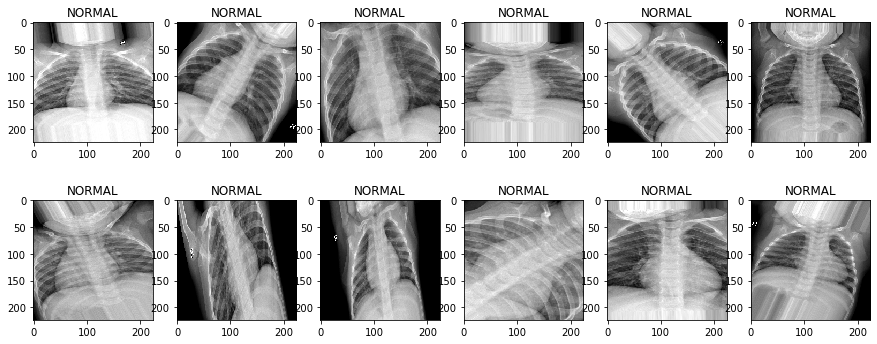

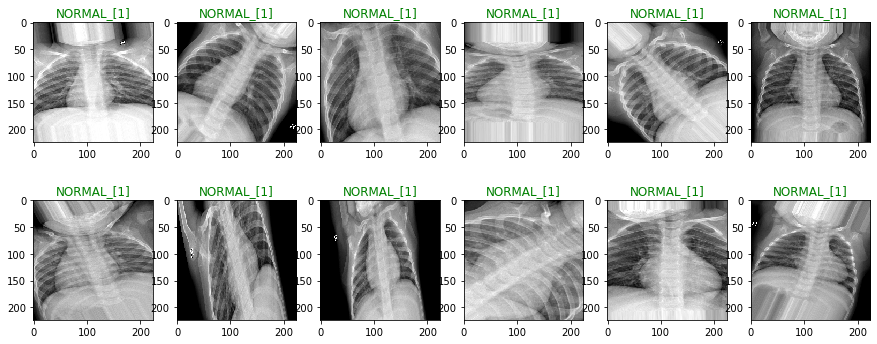

In [46]:
Normal_img_list = os.listdir('../Dataset_augmented_subfolders/Test/NORMAL/')

plt.figure(figsize=(15, 6))

for i, img in enumerate(Normal_img_list[0:12]):
    path_to_img = '../Dataset_augmented_subfolders/Test/NORMAL/'+str(img)
    img = load_img(path_to_img, target_size=(224, 224))
    ax = plt.subplot(2, 6, i+1)
    plt.imshow(img)
    plt.title("NORMAL")
    
    
plt.figure(figsize=(15, 6)) 
for i, img in enumerate(Normal_img_list[0:12]):
    path_to_img = '../Dataset_augmented_subfolders/Test/NORMAL/'+str(img)
    img = load_img(path_to_img, target_size=(224, 224))
    ax = plt.subplot(2, 6, i+1)
    plt.imshow(img)
    
    
    img = img_to_array(img)
    # expand dimensions to match the shape of model input
    img = np.expand_dims(img, axis=0)
    # Generate feature output by predicting on the input image
    feature_output = model.predict_classes(img)
#     print(feature_output[0])
    
    lab = feature_output[0]
#     print(lab)
    if lab[0]==1:
        plt.title(f"NORMAL_{lab}", color='g')
    else:
        plt.title(f"COVID_{lab}", color='r')

### COVID test images

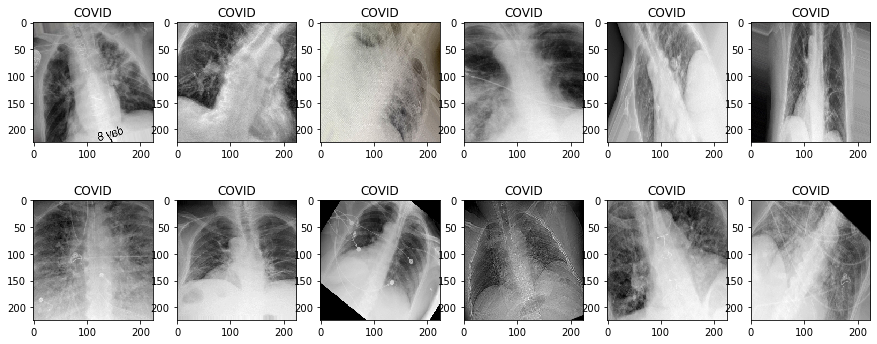

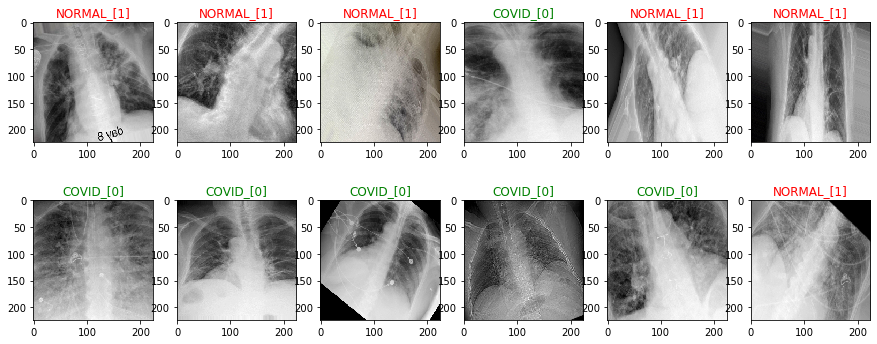

In [47]:
COVID_img_list = os.listdir('../Dataset_augmented_subfolders/Test/COVID/')
# path_to_img = '../Codes/Models/Test_Data_Set/COVID/16669_3_1.jpeg'
plt.figure(figsize=(15, 6))

for i, img in enumerate(COVID_img_list[0:12]):
    path_to_img = '../Dataset_augmented_subfolders/Test/COVID/'+str(img)
    img = load_img(path_to_img, target_size=(224, 224))
    ax = plt.subplot(2, 6, i+1)
    plt.imshow(img)
    plt.title("COVID")
    
    
plt.figure(figsize=(15, 6)) 
for i, img in enumerate(COVID_img_list[0:12]):
    path_to_img = '../Dataset_augmented_subfolders/Test/COVID/'+str(img)
    img = load_img(path_to_img, target_size=(224, 224))
    ax = plt.subplot(2, 6, i+1)
    plt.imshow(img)
    
    
    img = img_to_array(img)
    # expand dimensions to match the shape of model input
    img = np.expand_dims(img, axis=0)
    # Generate feature output by predicting on the input image
    feature_output = model.predict_classes(img)
    
    lab = feature_output[0]
#     print(lab)
    if lab[0]==1:
        plt.title(f"NORMAL_{lab}", color='r')
    else:
        plt.title(f"COVID_{lab}", color='g')